## Ejemplo

Una persona se toma un antiácido cada vez que el ph de su estómago alcanza un mínimo cercano a ph = 2.
Se monitoriza su pH y se obtiene la figura 1. Se mide el ph con respecto al tiempo y se pretende estudiar el efecto del antiácido aislándolo de la fluctuación natural del ph del estómago. (para simplificarlo, en este ejemplo se supone que ambos son independientes entre sí, es decir, tomar un antiácido no altera la flucutación natural del ph del estómago).

## Datos observados

Los datos observados (figura 1) se obtienen como resultado del código que aparece a continuación. En la vida real se medirían los datos en el experimento, pero para este ejemplo me los invento

-0.49726094768413676


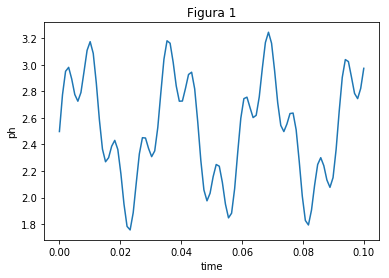

In [115]:
import numpy as np

import matplotlib.pyplot as plotter

from scipy.fftpack import fft, ifft


# Number of sample points
N = 100

# sample spacing. Es el tiempo que transcurre desde que se toma una muestra hasta que se toma la siguiente.
T = 1.0 / 1000.0 

#frequency 
F1 = 120
F2 = 33

x = np.linspace(0.0, N*T, N) #esto te da el tiempo en un vector. Hay N elementos equidistantes entre 0 (tiempo inicial) y N*T (tiempo final)


y1 = 0.25*(np.sin(F1 * 2*np.pi*x)) #esto es el vector que contiene la fluctuación normal del ph del estómago
y2 = 0.5*(np.sin(F2 * 2*np.pi*x)) #este vector conteiene la fluctuación debido al efecto del antiácido
print(min(y2)) #-0.49726094768413676 es el valor mínimo que alcanza y2
y2 = y2 + 0.49726094768413676 #sumando 0.49726094768413676, y2 es siempre mayor que 0. Esto se hace porque el antiácido siempre aumenta el ph, no lo hace disminuir

#y1 e y2 normalmente no se conocerían de antemano. En este caso se utilizan para obtener y_observada, pero en la vida real obtendrías y_observada como resultado del experimento sin tener ni idea de la existencia de y1 e y2


y_observada = 2 + y1 + y2 #ph medido. Se toma 2 como base, se suma la fluctuación natural y la fluctuación causada por los antiácidos





plotter.plot(x, y_observada) #se representa amplitud de la señal frente al tiempo
plotter.xlabel('time')
plotter.ylabel('ph')
plotter.axis('tight')
plotter.title("Figura 1")
# plt.grid()
plotter.show() #esto hace que el gráfico aparezca en pantalla




En la figura 1 no se aprecia claramente el efecto del antiácido debido a la superposición con la fluctuación natural. Para remediarlo, se emplea la transformada de Fourier.

## Transformada de Fourier

A continuación se usa la transformada de Fourier para descomponer y_observada en sus componentes y así poder estudiar mejor los patrones (ver figura 2):

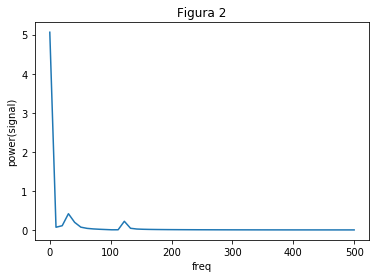

In [83]:
def plot_fourier (xf, yf):    
    plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2])) 
    plotter.xlabel('freq')
    plotter.ylabel('power(signal)')
    plotter.title("Figura 2")




def fourier (y, T, N):
    yf = fft(y) 
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return (xf, yf)
    
    
(x_f, y_f) = fourier (y_observada, T, N) 


plot_fourier (x_f, y_f)



    


## Conclusiones

En la figura 2 hay un pico fuerte con una frecuencia de 33 y uno más débil con una frecuencia de 120. Ahora hay que determinar cuál pertenece a la fluctuación debida a los antiácidos y cuál es la fluctuación natural (recuerda que y1 e y2 no se conocerían en un experimento real).

En este experimento en realidad sí se conocería de antemano la frecuencia correspondiente a los antiácidos ya que se sabe cada cuánto tiempo se administran, pero vamos a suponer que no conocemos el dato.

Sin embargo, sí se sabe que el antiácido produce un efecto mayor que la fluctuación natural pero con menor frecuencia. Así, se puede determinar que el pico de la izquierda se corresponde con los antiácidos y el de la derecha, con la fluctuación natural.

Así, se han podido separar ambos efectos, hallando su frecuencia e intensidad.

## Nota

La gráfica de la transformada de Fourier (figura 2) representa frecuencia en el eje x y amplitud al cuadrado en el eje y.

El pico enorme que sale en 0 según Juancar es el "nivel de continua". Básicamente si haces la media de todos los valores de la onda de origen (y_observada) y lo elevas al cuadrado debería dar lo mismo que el pico en 0 que te da la transformada de Fourier.

## Continuación

Ahora quiero, a partir del resultado de la transformada de Fourier, obtener las dos "ondas" separadas.

In [121]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

peaks, _ = find_peaks(2.0/N * np.abs(y_f[0:N//2]), height=0) #encuentra los picos en la figura 2 y devuelve un array con la posición en la que se encuentran

print("peaks:", peaks)

print ("frecuencia:", x_f[peaks]) #estas son las frecuencias para el pico. Son muy parecidas a las frecuencias de las ondas creadas anteriormente. Hay errores relacionados con Fourier, pregunta a Juancar
   
print("amplitud:", np.sqrt(2.0/N * np.abs(y_f[peaks]))) #Para hallar la amplitud se hace la raíz cuadrada del valor del eje y en el pico. Hay errores relacionados con Fourier, pregunta a Juancar

print("nivel de continua:", np.sqrt(2.0/N * np.abs(y_f[0]))) #el nivel de continua es la media de todos los valores de la onda que se metió a Fourier.

#print ("todas las amplitudes:", np.sqrt(2.0/N * np.abs(y_f)))

peaks: [ 3 12]
frecuencia: [ 30.6122449  122.44897959]
amplitud: [0.64921364 0.47723983]
nivel de continua: 2.2497887682527042


Hemos obtenido la frecuencia y la amplitud de los picos. Son valores parecidos a los originales, pero hay cierto error debido a la transformada de Fourier (preguntar a Juancar).

## Fluctuación debida al antiácido reconstruida

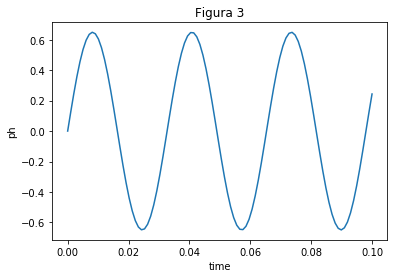

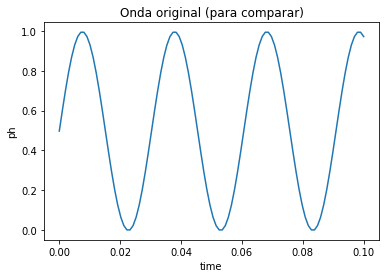

In [119]:
#para sacar una onda a partir de frecuencia, amplitud y fase:
#f(t) = amplitud * sin(2*pi*frecuencia*tiempo + fase)
#la fase en este caso nos da un poco lo mismo (y además se pierde en la transformada de Fourier). Pongo 0

y1_obtenida = np.sqrt(2.0/N * np.abs(y_f[peaks[0]])) * np.sin(2*np.pi*x_f[peaks[0]]*x + 0)

plotter.plot(x, y1_obtenida) #se representa amplitud de la señal frente al tiempo
plotter.xlabel('time')
plotter.ylabel('ph')
plotter.axis('tight')
plotter.title("Figura 3")
# plt.grid()
plotter.show() #esto hace que el gráfico aparezca en pantalla


plotter.plot(x, y2) #se representa amplitud de la señal frente al tiempo
plotter.xlabel('time')
plotter.ylabel('ph')
plotter.axis('tight')
plotter.title("Onda original (para comparar)")
# plt.grid()
plotter.show() #esto hace que el gráfico aparezca en pantalla

## Fluctuación natural reconstruida

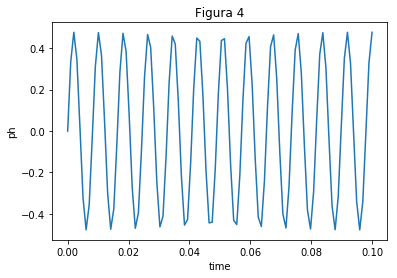

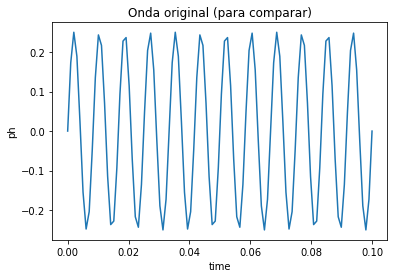

In [120]:
#para sacar una onda a partir de frecuencia, amplitud y fase:
#f(t) = amplitud * sin(2*pi*frecuencia*tiempo + fase)
#la fase en este caso nos da un poco lo mismo (y además se pierde en la transformada de Fourier). Pongo 0

y2_obtenida = np.sqrt(2.0/N * np.abs(y_f[peaks[1]])) * np.sin(2*np.pi*x_f[peaks[1]]*x + 0)

plotter.plot(x, y2_obtenida) #se representa amplitud de la señal frente al tiempo
plotter.xlabel('time')
plotter.ylabel('ph')
plotter.axis('tight')
plotter.title("Figura 4")
# plt.grid()
plotter.show() #esto hace que el gráfico aparezca en pantalla

plotter.plot(x, y1) #se representa amplitud de la señal frente al tiempo
plotter.xlabel('time')
plotter.ylabel('ph')
plotter.axis('tight')
plotter.title("Onda original (para comparar)")
# plt.grid()
plotter.show() #esto hace que el gráfico aparezca en pantalla

## Nota

Como podrás observar en la figura 3, la ordenada en el origen de la onda reconstruida es 0. No hay forma de saber cuál es la ordenada en el origen que tenía cada onda por separado, solo sabemos la ordenada en el origen de la suma de ambas (es el nivel de continua). De todas formas lo que nos interesa de verdad es la frecuencia y la amplitud. Por otra parte, comparando la onda reconstruida con la original nos damos cuenta de que se ha recuperado la frecuencia con bastante exactitud pero hay mucho error en la amplitud, sobre todo para la fluctuación natural.

En general, cuanto más marcado sea el pico en la gráfica de Fourier, menos error se comete con la amplitud. Por eso hay más error para la fluctuación natural (pico menos marcado) que para la fluctuación por el antiácido (pico más marcado).

## Suma de ambas

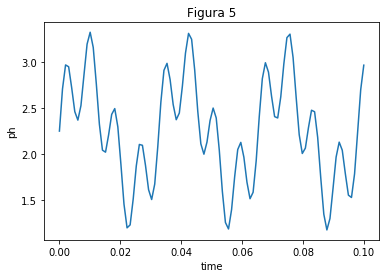

In [99]:
#para hacer la suma de ambas hay que añadir el nivel de continua (ordenada en el origen)

y_reconstruida = y1_obtenida + y2_obtenida + np.sqrt(2.0/N * np.abs(y_f[0]))

plotter.plot(x, y_reconstruida) #se representa amplitud de la señal frente al tiempo
plotter.xlabel('time')
plotter.ylabel('ph')
plotter.axis('tight')
plotter.title("Figura 5")
# plt.grid()
plotter.show() #esto hace que el gráfico aparezca en pantalla

## Conclusiones 2

Tras reconstruir las "ondas" (figuras 3 y 4) y sumarlas (figura 5) obtenemos una señal parecida a la correspondiente a y_observada pero con diferencias debidas a los errores cometidos en la transformada de Fourier (preguntar a Juancar). Eso quiere decir que lo obtenido en las figuras 3 y 4 es parecido a lo real pero no es exacto. Si esto fuera un experimento real ese sería nuestro resultado. Se podría intentar reducir el error (preguntar a Juancar) pero no se podría eliminar.

La reconstrucción de la suma de las dos ondas a partir de la transformada de Fourier (figura 5) se podría hacer mejor por otros métodos (la inversa de la transformada de Fourier debería dar la onda original exacta). No obstante, para sacar las dos ondas constituyentes de la señal original hay que hacerlo como se ha descrito en este ejemplo.

Sumar las dos ondas constituyentes tiene la utilidad de que se puede comparar la suma con la onda original, lo que permite hasta cierto punto determinar la magnitud de los errores. Ten en cuenta que lo que hemos hecho en este ejemplo de comparar cada onda constituyente reconstruida con la original no se podría hacer en la vida real al no disponer de las ondas constituyentes originales.